# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)


In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
# import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


plt.style.use('ggplot')
pd.options.display.float_format = '{:,.4f}'.format

from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))


a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [18]:
bankData = pd.read_csv("bank-full.csv")
bankData.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [19]:
bankData.shape

(45211, 17)

In [20]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
bankData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

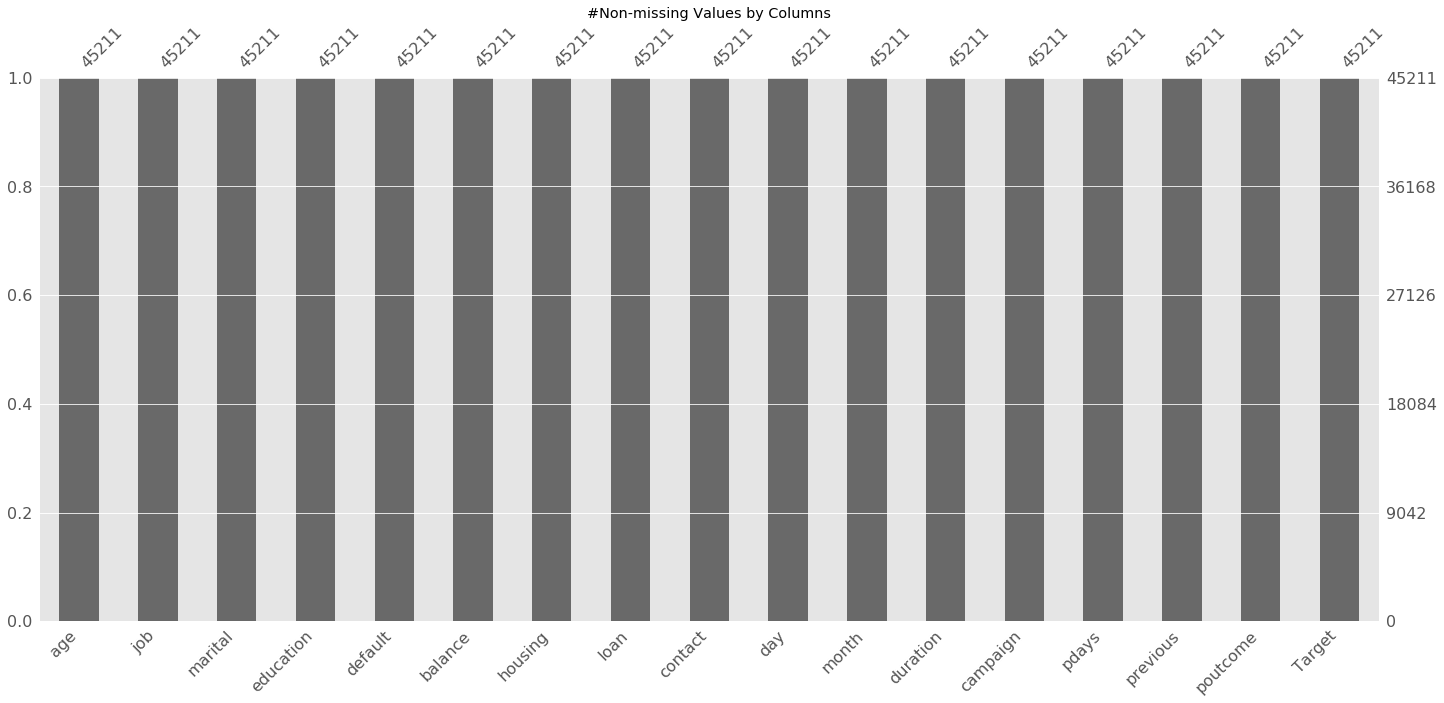

In [27]:
#Checking Missing Values
plt.title('#Non-missing Values by Columns')
msno_plot.bar(bankData);

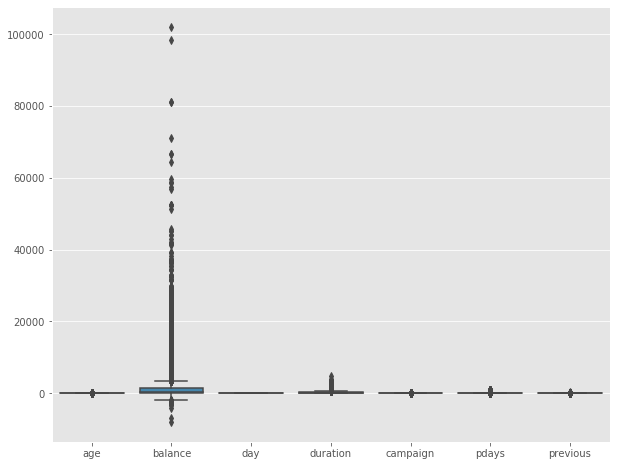

In [30]:
#Checking Outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=bankData)

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [67]:
#I decide to treat outlier for the continous variable - duration balance
Q1a = bankData['duration'].quantile(0.25)
Q3a = bankData['duration'].quantile(0.75)
IQRa = Q3a - Q1a    #IQR is interquartile range. 


Q1b = bankData['balance'].quantile(0.25)
Q3b = bankData['balance'].quantile(0.75)
IQRb = Q3b - Q1b    #IQR is interquartile range. 


filter = (bankData['duration'] >= Q1a - 1.5 * IQRa) & (bankData['duration'] <= Q3a + 1.5 *IQRa) & (bankData['balance'] >= Q1b - 1.5 * IQRb) & (bankData['balance'] <= Q3b + 1.5 *IQRb)
bankData.loc[filter]  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


2. Multivariate analysis (8 marks)


a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.


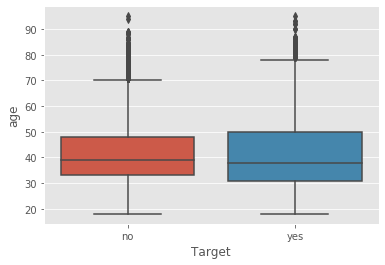

In [68]:
sns.boxplot(bankData['Target'], bankData['age']);

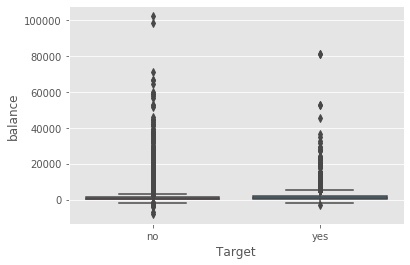

In [69]:
sns.boxplot(bankData['Target'], bankData['balance']);

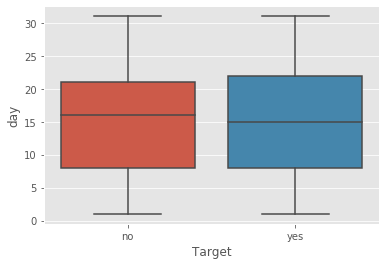

In [70]:
sns.boxplot(bankData['Target'], bankData['day']);

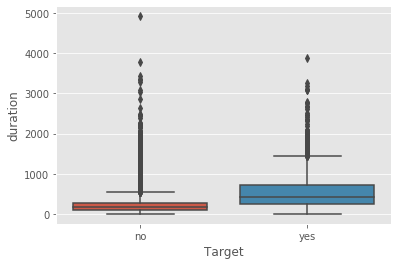

In [71]:
sns.boxplot(bankData['Target'], bankData['duration']);

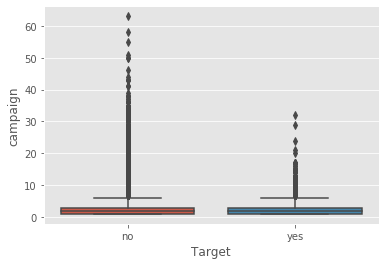

In [72]:
sns.boxplot(bankData['Target'], bankData['campaign']);

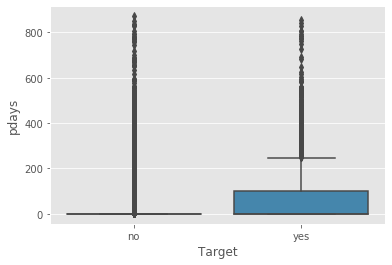

In [73]:
sns.boxplot(bankData['Target'], bankData['pdays']);

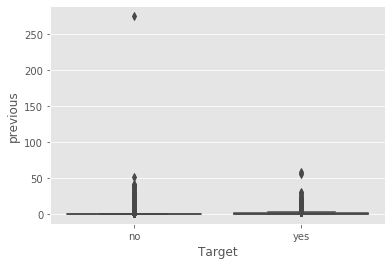

In [74]:
sns.boxplot(bankData['Target'], bankData['previous']);

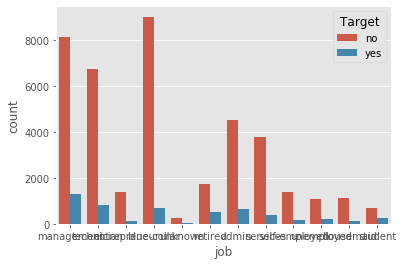

In [75]:
sns.countplot(bankData['job'],hue=bankData['Target']);

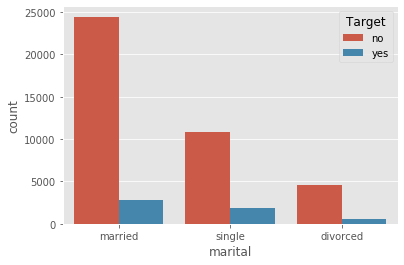

In [76]:
sns.countplot(bankData['marital'],hue=bankData['Target']);

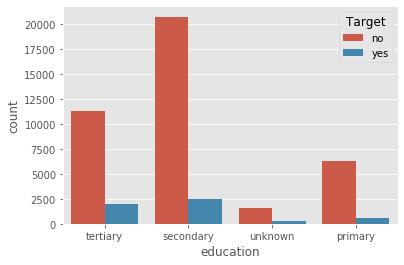

In [77]:
sns.countplot(bankData['education'],hue=bankData['Target']);

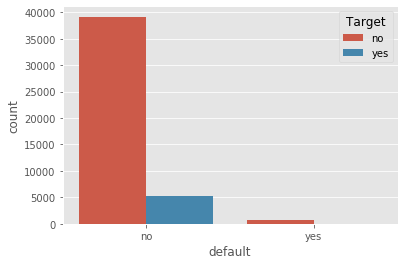

In [78]:
sns.countplot(bankData['default'],hue=bankData['Target']);

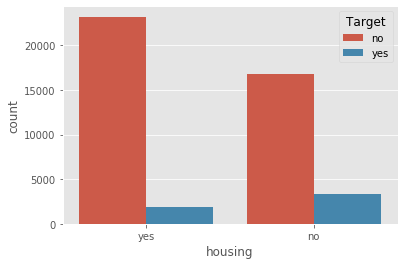

In [79]:
sns.countplot(bankData['housing'],hue=bankData['Target']);

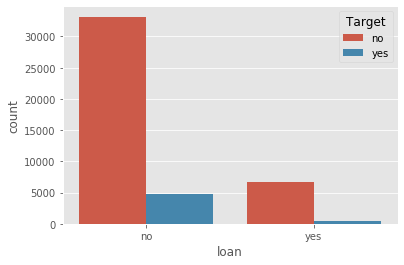

In [80]:
sns.countplot(bankData['loan'],hue=bankData['Target']);

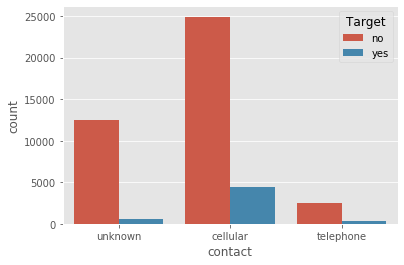

In [81]:
sns.countplot(bankData['contact'],hue=bankData['Target']);

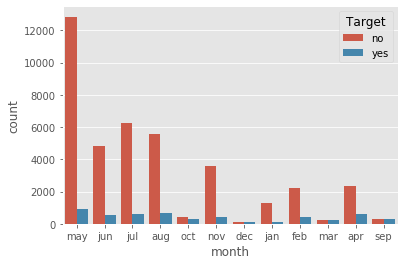

In [82]:
sns.countplot(bankData['month'],hue=bankData['Target']);

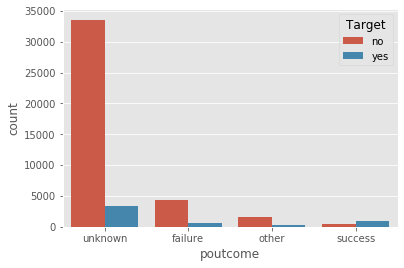

In [83]:
sns.countplot(bankData['poutcome'],hue=bankData['Target']);

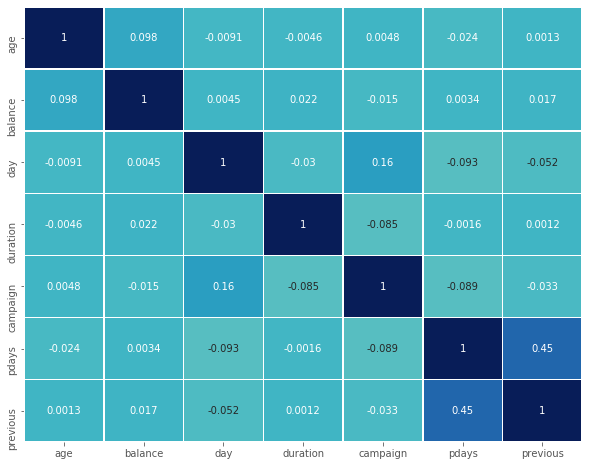

In [84]:
#Correlation plot - Understanding degree of association among different variable
plt.figure(figsize=(10,8))

sns.heatmap(bankData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [ ]:
#I deleted outliers for balance and duration, and then look at the boxplot for continous predictors and count plot for categorical predictors. 

# Deliverable – 2 (Prepare the data for analytics) – (10)

1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [85]:
#convert the columns with an 'object' datatype into categorical variables
for feature in bankData.columns: # Loop through all columns in the dataframe
    if bankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankData[feature] = pd.Categorical(bankData[feature])# Replace strings with an integer
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [86]:
print(bankData.job.value_counts())
print(bankData.marital.value_counts())
print(bankData.education.value_counts())
print(bankData.default.value_counts())
print(bankData.housing.value_counts())
print(bankData.loan.value_counts())
print(bankData.contact.value_counts())
print(bankData.month.value_counts())
print(bankData.poutcome.value_counts())
print(bankData.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [87]:
oneHotCols=["job","marital","education","default","housing","loan","contact","month","poutcome"]

In [88]:
bankData=pd.get_dummies(bankData, columns=oneHotCols)
bankData.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [89]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   balance              45211 non-null  int64   
 2   day                  45211 non-null  int64   
 3   duration             45211 non-null  int64   
 4   campaign             45211 non-null  int64   
 5   pdays                45211 non-null  int64   
 6   previous             45211 non-null  int64   
 7   Target               45211 non-null  category
 8   job_admin.           45211 non-null  uint8   
 9   job_blue-collar      45211 non-null  uint8   
 10  job_entrepreneur     45211 non-null  uint8   
 11  job_housemaid        45211 non-null  uint8   
 12  job_management       45211 non-null  uint8   
 13  job_retired          45211 non-null  uint8   
 14  job_self-employed    45211 non-null  uint8   
 15  job_services       

In [90]:
#Split data
X = bankData.drop("Target" , axis=1)
y = bankData.pop("Target")

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=12345)

# Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)


In [109]:
replaceStruct = {
                "Target":     {"no": 0, "yes": 1 } 
                    }

In [110]:
bankData=bankData.replace(replaceStruct)
bankData.head(10)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [96]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [111]:
# Logistic Regression 
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


        0      1      2      3       4       5      6      7       8       9  \
0 -0.0018 0.0000 0.0078 0.0041 -0.0909 -0.0005 0.0066 0.0427 -0.2626 -0.2294   

   ...     42      43      44     45     46      47      48     49      50  \
0  ... 1.3508 -0.4738 -0.9083 0.8409 0.7398 -0.7424 -0.5136 1.4734 -0.9360   

   intercept  
0    -0.7187  

[1 rows x 52 columns]


In [112]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9048953111176644


In [114]:
# Decision Tree Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=12345)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [119]:
#Scoring Dicision Tree
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8801238572692421


In [115]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [116]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [117]:
treeObj = model_entropy.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_entropy.get_depth())
print('Total Leaves:',model_entropy.get_n_leaves())

Total Nodes: 4847
Depth: 42
Total Leaves: 2424


In [118]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [120]:
#Baggin
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [121]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

0.9111618991447951


In [122]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [123]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.8975965791801829


In [124]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [125]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.9083603656738425


In [126]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [127]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.9129312887053966


3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [ ]:
#Random Forest shows the higest accuracy. 

tempResultsDf = pd.DataFrame({'Method':['Random Forest-Grid Search'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf